http://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

The idea with ARIMA models is that the final residual should look like white noise otherwise, there is juice or information available in the data to extract

In [34]:
from __future__ import division
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
%matplotlib inline

In [3]:
def date_parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [4]:
series = read_csv('shampoo_sales.csv',
                  header=0, 
                  index_col=0, #time
                  squeeze=True, #this returns a series
                  parse_dates=[0],  #allows for automatic parsing of dates!
                  date_parser = date_parser
                 )

In [5]:
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

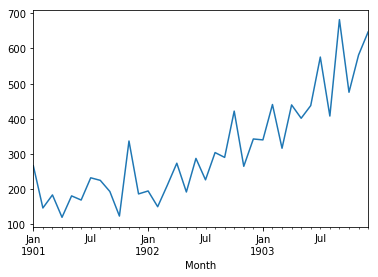

In [6]:
series.plot()
plt.show()

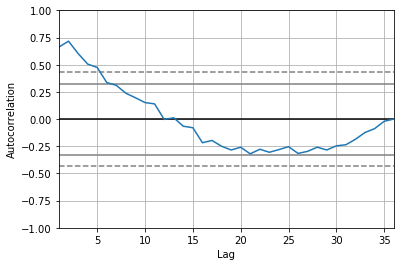

In [7]:
autocorrelation_plot(series)
plt.show()

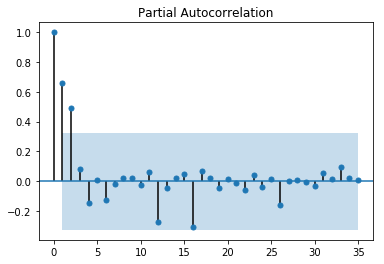

In [8]:
plot_pacf(series)
plt.show()

p: The number of lag observations included in the model, also called the lag order.

d: The number of times that the raw observations are differenced, also called the degree of differencing.

q: The size of the moving average window, also called the order of moving average.

In [9]:
#fit entire model
model = ARIMA(series, order=(5,1,0))

In [10]:
model_fit = model.fit(disp=0)

In [11]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          ARIMA Model Results                                          
=======================================================================================================
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Thu, 20 Jul 2017   AIC                            406.340
Time:                                                 15:06:59   BIC                            417.227
Sample:                                             02-01-1901   HQIC                           410.098
                                                  - 12-01-1903                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales of shampoo over a three year period    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales of shampoo over a three year period    -0.6203      0.282     -2.203      0.036      -1.172      -0.068
ar.L3.D.Sales of shampoo over a three year period    -0.3606      0.295     -1.222      0.231      -0.939       0.218
ar.L4.D.Sales of shampoo over a three year period    -0.1252      0.280     -0.447      0.658      -0.674       0.424
ar.L5.D.Sales of shampoo over a three year period     0.1289      0.191      0.673      0.506      -0.246       0.504
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0617           -0.5064j            1.1763           -0.4292
AR.2           -1.0617           +0.5064j            1.1763            0.4292
AR.3            0.0816           -1.3804j            1.3828           -0.2406
AR.4            0.0816           +1.3804j            1.3828            0.2406
AR.5            2.9315           -0.0000j            2.9315           -0.0000
-----------------------------------------------------------------------------
"""

In [12]:
residuals = DataFrame(model_fit.resid)

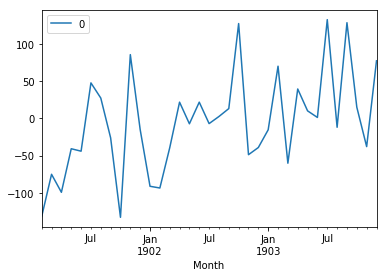

In [13]:
residuals.plot()
plt.show()

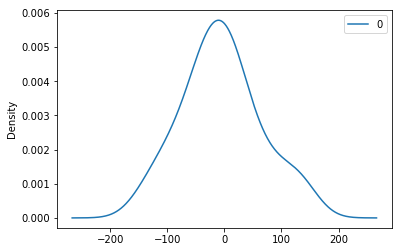

In [14]:
residuals.plot(kind='kde')
plt.show()

In [15]:
residuals.describe()

,0
count,35.000000
mean,-5.495203
std,68.132882
min,-133.296589
25%,-42.477874
50%,-7.186603
75%,24.748348
max,133.237993


# Train - Test

In [16]:
XX = series.values
XX.shape

(36,)

In [17]:
#splitting
train_size = int(len(XX)*2/3)
train_size

24

In [18]:
train_set = XX[:train_size]
test_set = XX[train_size:]
train_set.shape, test_set.shape

((24,), (12,))

In [19]:
train_set[0]

266.0

In [20]:
history = list(train_set)

In [21]:
history[0] = 3333

In [22]:
history = list(train_set)
len(history)

24

In [23]:
predictions = []

In [31]:
test_len = len(test_set)
test_len

12

In [40]:
%%time
for tt in range(len(test_set)):
    output = ARIMA(history, order=(5,1,0)).fit(method='css', disp=0).forecast()
    y_hat = output[0] #0th is the index of the prediction
    predictions.append(y_hat)
    
    observation = test_set[tt]
    #history.append(observation)
    history.append(y_hat)
    
    print "predicted: {}, expected: {}".format(y_hat, observation)

predicted: [ 513.12964608], expected: 339.7
predicted: [ 520.4449063], expected: 440.4
predicted: [ 527.80250739], expected: 315.9
predicted: [ 535.19405359], expected: 439.3
predicted: [ 543.5725339], expected: 401.3
predicted: [ 551.45658021], expected: 437.4
predicted: [ 559.15546998], expected: 575.5
predicted: [ 566.65325628], expected: 407.6
predicted: [ 574.57542014], expected: 682.0
predicted: [ 582.46016724], expected: 475.3
predicted: [ 590.29358904], expected: 581.3
predicted: [ 597.95359769], expected: 646.9
CPU times: user 1.8 s, sys: 6 s, total: 7.8 s
Wall time: 1.09 s


In [25]:
error = mean_squared_error(predictions, test_set)
error

18743.644548971621

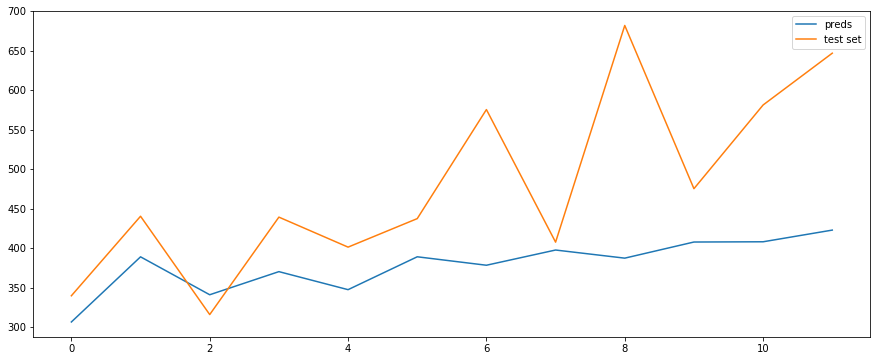

In [26]:
plt.figure(figsize=(15,6))
plt.plot(predictions, label='preds')
plt.plot(test_set, label='test set')
plt.legend()
plt.show()

In [27]:
fitted = ARIMA(list(train_set), order=(5,1,0)).fit(disp=0)
fitted

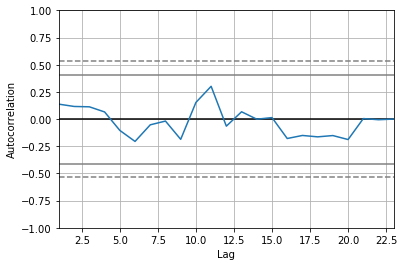

In [28]:
autocorrelation_plot(fitted.resid)

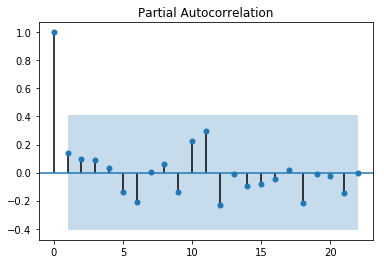

In [29]:
plot_pacf(fitted.resid)
plt.show()